# **EDA: ANÁLISIS EXPLORATORIO DE DATOS**

Este notebook contiene la revisión exploratoria inicial de los datasets originales, con el objetivo de evaluar su estructura, calidad y estado general antes de aplicar cualquier proceso de limpieza o transformación.

La revisión se realiza mediante una función estructurada que centraliza la validación del dataset y permite identificar posibles problemas de calidad de datos, inconsistencias y características relevantes para su posterior preparación.

In [12]:
# ============================================================================
# CONFIGURACIÓN DEL ENTORNO
# Importación de librerías para la manipulación, análisis y visualización
# de datos durante la fase exploratoria (EDA).
# ============================================================================

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt


# ============================================================================
# CONFIGURACIÓN DE VISUALIZACIÓN EN PANDAS
# Ajuste de opciones para mejorar la legibilidad durante la inspección
# exploratoria, mostrando todas las columnas y un número acotado de filas.
# ============================================================================

pd.set_option("display.max_columns", None)  # mostrar todas las columnas
pd.set_option("display.max_rows", 100)      # limitar la visualización de filas
pd.set_option("display.width", None)        # ajustar automáticamente el ancho


# ============================================================================
# CARGA DE LOS DATASETS
# Se cargan los datasets originales desde data/raw manteniéndolos en su estado
# original (sin modificaciones) para el análisis inicial.
# ============================================================================

path_df1 = "../data/raw/Customer Flight Activity.csv"
path_df2 = "../data/raw/Customer Loyalty History.csv"

df1 = pd.read_csv(path_df1)
df2 = pd.read_csv(path_df2)


# ============================================================================
# INSPECCIÓN INICIAL
# Visualización de las primeras filas para verificar la correcta carga,
# estructura general y nombres de columnas.
# ============================================================================

display(df1.head())
display(df2.head())


# ============================================================================
# VALIDACIÓN DE LA CLAVE DE UNIÓN
# Se comprueba el grado de correspondencia entre ambas tablas a través de la
# clave común. Esto permite justificar el tipo de unión a utilizar.
# ============================================================================

key = "Loyalty Number" # Clave de unión

match_df1 = df1[key].isin(df2[key]).mean() * 100
match_df2 = df2[key].isin(df1[key]).mean() * 100

print("🔗 ANÁLISIS DE CORRESPONDENCIA DE CLAVES")
print(f"% claves de df1 presentes en df2: {match_df1:.2f}%")
print(f"% claves de df2 presentes en df1: {match_df2:.2f}%")

if match_df1 == 100 and match_df2 == 100:
    print("✅ Correspondencia completa → se utilizará INNER JOIN")
else:
    print("🚩 FLAG: existen claves sin correspondencia → revisar tipo de unión")


# ============================================================================
# UNIÓN DE DATASETS
# Se realiza la unión mediante la clave común. Dado que la correspondencia de
# claves es completa, se utiliza un inner join sin pérdida de registros.
# ============================================================================

df = df1.merge(df2, on=key, how="inner")

# Visualización preliminar del dataset resultante
display(df.head())


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


🔗 ANÁLISIS DE CORRESPONDENCIA DE CLAVES
% claves de df1 presentes en df2: 100.00%
% claves de df2 presentes en df1: 100.00%
✅ Correspondencia completa → se utilizará INNER JOIN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [13]:
def eda(df):
    """
    Realiza un análisis exploratorio estructurado (EDA) sobre un DataFrame.

    Parámetros
    ----------
    df : pandas.DataFrame
        Dataset a analizar.

    Devuelve
    --------
    None
        La función no devuelve ningún objeto. Muestra en pantalla el análisis
        exploratorio, estadísticas descriptivas, visualizaciones y flags de calidad.

    Qué analiza
    -----------
    1) Visión general:
       - Vista inicial (head), dimensiones, info() y duplicados.

    2) Calidad de columnas:
       - Tabla resumen por columna (tipos, nulos, cardinalidad).
       - Flags por umbral de nulos (bajo/moderado/alto).

    3) Análisis de nulos:
       - Categóricas: distribución (porcentaje + recuento) incluyendo NaN.
       - Numéricas: % nulos + histograma + KDE (si aplica) + media/mediana/moda.

    4) Estadística descriptiva y controles básicos:
       - Describe numéricas y categóricas.
       - Flags: valores negativos en numéricas; varianza 0 en numéricas.

    5) Outliers:
       - Detección por IQR (1.5x) + boxplot para columnas con outliers.

    Objetivo
    --------
    Facilitar decisiones de limpieza (imputación, tipado, tratamiento de outliers)
    y comprensión del dataset antes de aplicar transformaciones.
    """

    # ==================================================
    # 1) VISIÓN GENERAL
    # ==================================================
    # Objetivo: obtener una primera fotografía del dataset (tamaño, estructura,
    # tipos básicos y presencia de duplicados) antes de entrar en métricas y flags.
    print("📐 VISIÓN GENERAL DEL DATASET")
    print("Vista inicial (primeras 5 filas):")
    display(df.head())

    filas, columnas = df.shape
    print(f"Dimensiones: {filas} filas × {columnas} columnas")

    print("\nInformación general (dtypes, nulos, memoria):")
    df.info()

    duplicados = df.duplicated().sum()
    pct_dup = (duplicados / filas * 100) if filas else 0
    print(f"\n🚩 FLAG: duplicados - Filas duplicadas: {duplicados} ({pct_dup:.2f}%)")
    print("-" * 70)

    # ==================================================
    # 2) CALIDAD DE COLUMNAS
    # ==================================================
    # Objetivo: construir una tabla resumen por columna para identificar
    # rápidamente variables problemáticas (nulos, tipos).
    print("🚑 CALIDAD DE COLUMNAS")

    calidad = (
        pd.DataFrame({
            "Tipo": df.dtypes,
            "Nulos": df.isnull().sum(),
            "% Nulos": (df.isnull().mean() * 100).round(2),
            "Valores Únicos": df.nunique(),
            "% Cardinalidad": (df.nunique()/filas*100).round(2)
            })
        .sort_values("% Nulos", ascending=False)
    )

    display(calidad)

    # ---- Flags por nulos (umbrales) ----
    # Objetivo: priorizar el tratamiento de nulos clasificando columnas según severidad.
    cols_nulos_bajo = calidad[(calidad["% Nulos"] > 0) & (calidad["% Nulos"] <= 5)].index.tolist()
    cols_nulos_moderado = calidad[(calidad["% Nulos"] > 5) & (calidad["% Nulos"] <= 20)].index.tolist()
    cols_nulos_alto = calidad[calidad["% Nulos"] > 20].index.tolist()

    print("\n🚩 FLAG: nulos - Clasificación por umbral (% nulos)")
    print("  🟢 Bajo (≤ 5%):")
    if cols_nulos_bajo:
        for col in cols_nulos_bajo:
            print(f"    - {col} ({calidad.loc[col, '% Nulos']:.2f}%)")
    else:
        print("    - Ninguna")

    print("  🟡 Moderado (5%–20%):")
    if cols_nulos_moderado:
        for col in cols_nulos_moderado:
            print(f"    - {col} ({calidad.loc[col, '% Nulos']:.2f}%)")
    else:
        print("    - Ninguna")

    print("  🔴 Alto (> 20%):")
    if cols_nulos_alto:
        for col in cols_nulos_alto:
            print(f"    - {col} ({calidad.loc[col, '% Nulos']:.2f}%)")
    else:
        print("    - Ninguna")

    # ==================================================
    # 3) ANÁLISIS DE NULOS
    # ==================================================
    # Objetivo: identificar variables con nulos y entender el patrón básico:
    # - En categóricas: distribución de categorías + NaN.
    # - En numéricas: impacto de nulos y forma de la distribución para orientar imputación.

    # --- 3.1 Nulos en categóricas ---
    cols_cat = df.select_dtypes(include=["O"]).columns
    cols_cat_nulos = [c for c in cols_cat if df[c].isnull().any()]

    print("\n🔤 NULOS EN VARIABLES CATEGÓRICAS")
    if cols_cat_nulos:
        for col in cols_cat_nulos:
            pct_nulos = df[col].isnull().mean() * 100
            print(f"\n📌 {col} — 🚩 FLAG: nulos_categorica ({pct_nulos:.2f}%)")

            dist_pct = df[col].value_counts(normalize=True, dropna=False) * 100
            dist_cnt = df[col].value_counts(dropna=False)

            display(pd.DataFrame({
                "Porcentaje": dist_pct.round(2),
                "Recuento": dist_cnt
            }))
    else:
        print("No hay variables categóricas con nulos.")

    # --- 3.2 Nulos en numéricas ---
    num_cols = df.select_dtypes(include=["number"]).columns
    cols_num_nulos = [c for c in num_cols if df[c].isnull().any()]

    print("\n📊 NULOS EN VARIABLES NUMÉRICAS")
    if cols_num_nulos:
        for col in cols_num_nulos:
            pct_nulos = df[col].isnull().mean() * 100
            print(f"\n📌 {col} — 🚩 FLAG: nulos_numerica ({pct_nulos:.2f}%)")

            plt.figure(figsize=(6, 4))
            s = pd.to_numeric(df[col], errors="coerce").dropna()

            # Histograma en densidad para comparar con KDE si aplica
            s.hist(bins=30, density=True, alpha=0.6)

            # KDE solo si hay suficientes datos y variabilidad
            if (len(s) >= 20) and (s.nunique() > 1) and (s.std() > 0):
                try:
                    s.plot(kind="kde", linewidth=2)
                except Exception:
                    pass

            media = s.mean()
            mediana = s.median()
            moda = s.mode()[0]

            plt.axvline(media, color="red", linestyle="--", label=f"Media: {media:.2f}")
            plt.axvline(mediana, color="green", linestyle="--", label=f"Mediana: {mediana:.2f}")
            if not np.isnan(moda):
                plt.axvline(moda, color="blue", linestyle="--", label=f"Moda: {moda:.2f}")

            plt.title(f"Distribución de {col}")
            plt.xlabel(col)
            plt.ylabel("Densidad")
            plt.legend()
            plt.show()
    else:
        print("No hay variables numéricas con nulos.")

    # ==================================================
    # 4) ESTADÍSTICAS DESCRIPTIVAS + FLAGS BÁSICAS
    # ==================================================
    # Objetivo: describir numéricas/categóricas y detectar incoherencias claras
    # (negativos y varianza 0) que suelen indicar errores o variables sin valor.
    print("\n📊 ESTADÍSTICAS DESCRIPTIVAS — NUMÉRICAS")
    if len(num_cols) > 0:
        display(df[num_cols].describe().T)

        cols_negativos = df[num_cols].columns[df[num_cols].min() < 0].tolist()
        cols_var_0 = df[num_cols].columns[df[num_cols].var() == 0].tolist()

        if cols_negativos:
            print("\n🚩 FLAG: rango - Valores negativos detectados en variables numéricas")
            for col in cols_negativos:
                min_val = df[col].min()
                print(f"  - {col} (mínimo: {min_val})")
        else:
            print("\n✅ No se detectaron valores negativos en variables numéricas.")

        if cols_var_0:
            print("\n🚩 FLAG: varianza - Variables con varianza 0 (sin variabilidad)")
            for col in cols_var_0:
                print(f"  - {col}")
        else:
            print("\n✅ No se detectaron variables con varianza 0.")
    else:
        print("No hay variables numéricas para describir.")

    print("\n🔤 ESTADÍSTICAS DESCRIPTIVAS — CATEGÓRICAS")
    if len(cols_cat) > 0:
        display(df[cols_cat].describe().T)
    else:
        print("No hay variables categóricas para describir.")

    # ==================================================
    # 4.1) MUESTRA DE CATEGORÍAS ÚNICAS (TOP N)
    # ==================================================
    # Objetivo: validar formato y consistencia de variables categóricas mostrando
    # una muestra acotada.
    print("\n📝 MUESTRA DE CATEGORÍAS (TOP 10) — VARIABLES CATEGÓRICAS")
    if len(cols_cat) > 0:
        for col in cols_cat:
            n_unique = df[col].nunique(dropna=False)
            print(f"\n📌 {col} — {n_unique} valores únicos (mostrando hasta 10)")
            valores = pd.Series(df[col].dropna().unique()).head(10)
            display(pd.DataFrame(valores, columns=["Valor (muestra)"]))
    else:
        print("No hay variables categóricas.")

    # ==================================================
    # 5) OUTLIERS (IQR)
    # ==================================================
    # Objetivo: detectar valores atípicos con IQR (1.5x) como señal para posibles
    # transformaciones, winsorización o tratamiento específico en limpieza.
    print("\n⚠️ OUTLIERS — Método IQR (1.5x)")
    if len(num_cols) > 0:
        for col in num_cols:
            s = pd.to_numeric(df[col], errors="coerce").dropna()
            if s.empty:
                continue

            q1 = s.quantile(0.25)
            q3 = s.quantile(0.75)
            iqr = q3 - q1
            if iqr == 0:
                continue

            limite_inferior = q1 - 1.5 * iqr
            limite_superior = q3 + 1.5 * iqr
            outliers = ((s < limite_inferior) | (s > limite_superior)).sum()

            if outliers > 0:
                pct_out = outliers / len(s) * 100
                print(f"🚩 FLAG: outliers - {col}: {outliers} ({pct_out:.2f}%)")

                media = s.mean()
                moda = s.mode()[0]

                plt.figure(figsize=(6, 2))
                sns.boxplot(x=s)
                plt.axvline(media, color="red", linestyle="--", label=f"Media: {media:.2f}")
                if not np.isnan(moda):
                    plt.axvline(moda, color="blue", linestyle="--", label=f"Moda: {moda:.2f}")
                plt.title(f"Boxplot de {col}")
                plt.legend()
                plt.show()
    else:
        print("No hay variables numéricas para análisis de outliers.")

    print("\n🏁 REVISIÓN EDA FINALIZADA")


📐 VISIÓN GENERAL DEL DATASET
Vista inicial (primeras 5 filas):


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


Dimensiones: 405624 filas × 25 columnas

Información general (dtypes, nulos, memoria):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     4

,Tipo,Nulos,% Nulos,Valores Únicos,% Cardinalidad
Cancellation Month,float64,355560,87.66,12,0.00
Cancellation Year,float64,355560,87.66,6,0.00
Salary,float64,102672,25.31,5890,1.45
Year,int64,0,0.00,2,0.00
Flights with Companions,int64,0,0.00,12,0.00
Total Flights,int64,0,0.00,33,0.01
Month,int64,0,0.00,12,0.00
Flights Booked,int64,0,0.00,22,0.01
Loyalty Number,int64,0,0.00,16737,4.13
Points Redeemed,int64,0,0.00,587,0.14



🚩 FLAG: nulos - Clasificación por umbral (% nulos)
  🟢 Bajo (≤ 5%):
    - Ninguna
  🟡 Moderado (5%–20%):
    - Ninguna
  🔴 Alto (> 20%):
    - Cancellation Month (87.66%)
    - Cancellation Year (87.66%)
    - Salary (25.31%)

🔤 NULOS EN VARIABLES CATEGÓRICAS
No hay variables categóricas con nulos.

📊 NULOS EN VARIABLES NUMÉRICAS

📌 Salary — 🚩 FLAG: nulos_numerica (25.31%)


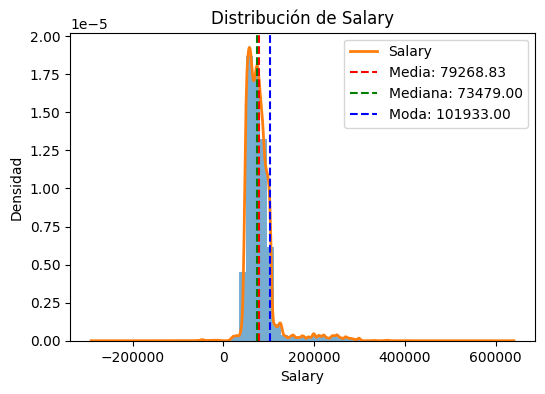


📌 Cancellation Year — 🚩 FLAG: nulos_numerica (87.66%)


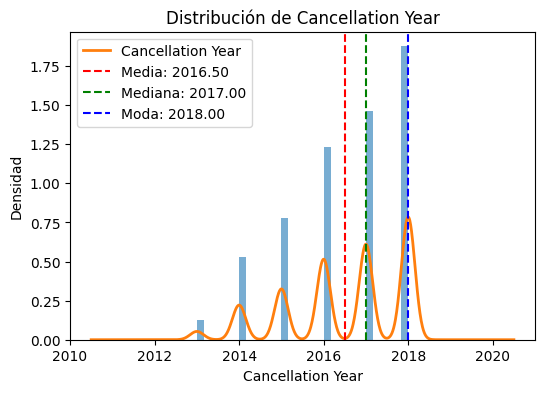


📌 Cancellation Month — 🚩 FLAG: nulos_numerica (87.66%)


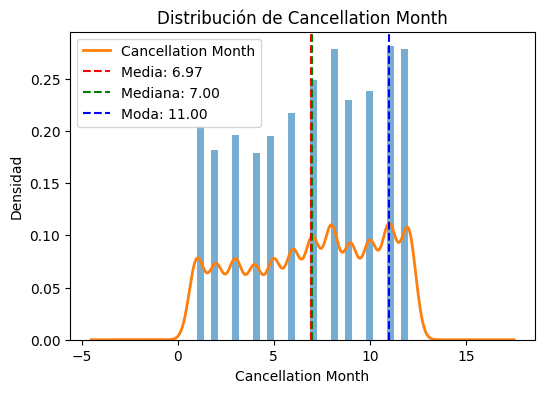


📊 ESTADÍSTICAS DESCRIPTIVAS — NUMÉRICAS


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00



🚩 FLAG: rango - Valores negativos detectados en variables numéricas
  - Salary (mínimo: -58486.0)

✅ No se detectaron variables con varianza 0.

🔤 ESTADÍSTICAS DESCRIPTIVAS — CATEGÓRICAS


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200



📝 MUESTRA DE CATEGORÍAS (TOP 10) — VARIABLES CATEGÓRICAS

📌 Country — 1 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Canada



📌 Province — 11 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Alberta
1,Ontario
2,British Columbia
3,Saskatchewan
4,Quebec
5,Newfoundland
6,Manitoba
7,New Brunswick
8,Nova Scotia
9,Prince Edward Island



📌 City — 29 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Edmonton
1,Toronto
2,Dawson Creek
3,Vancouver
4,Regina
5,Montreal
6,Sudbury
7,Quebec City
8,Peace River
9,St. John's



📌 Postal Code — 55 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,T9G 1W3
1,M1R 4K3
2,U5I 4F1
3,V5R 1W3
4,P1L 8X8
5,P1J 8T7
6,S6J 3G0
7,H2T 9K8
8,V6E 3D9
9,M5V 1G5



📌 Gender — 2 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Female
1,Male



📌 Education — 5 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Bachelor
1,College
2,Master
3,High School or Below
4,Doctor



📌 Marital Status — 3 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Married
1,Single
2,Divorced



📌 Loyalty Card — 3 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Aurora
1,Nova
2,Star



📌 Enrollment Type — 2 valores únicos (mostrando hasta 10)


,Valor (muestra)
0,Standard
1,2018 Promotion



⚠️ OUTLIERS — Método IQR (1.5x)
🚩 FLAG: outliers - Flights Booked: 528 (0.13%)


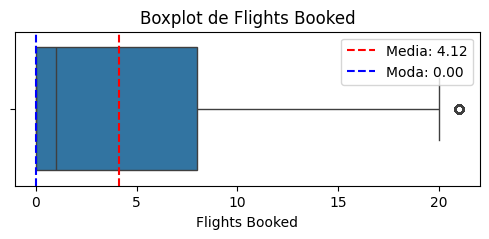

🚩 FLAG: outliers - Flights with Companions: 71560 (17.64%)


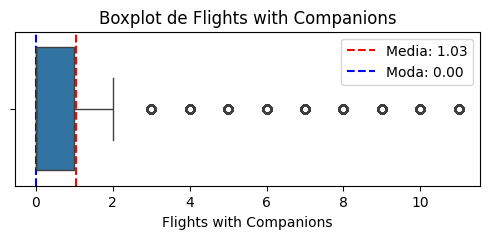

🚩 FLAG: outliers - Total Flights: 1984 (0.49%)


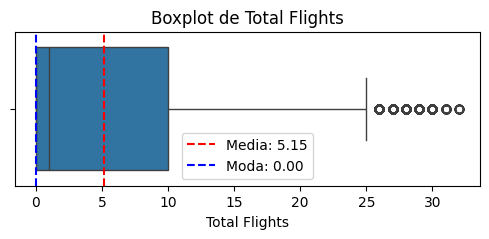

🚩 FLAG: outliers - Distance: 146 (0.04%)


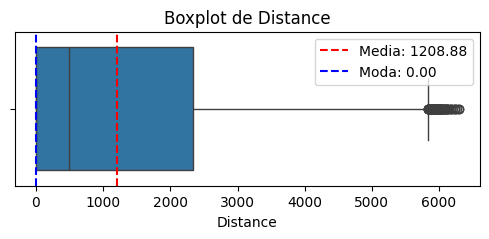

🚩 FLAG: outliers - Points Accumulated: 127 (0.03%)


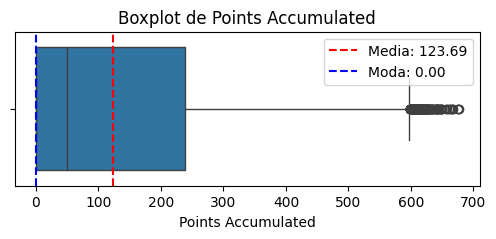

🚩 FLAG: outliers - Salary: 13320 (4.40%)


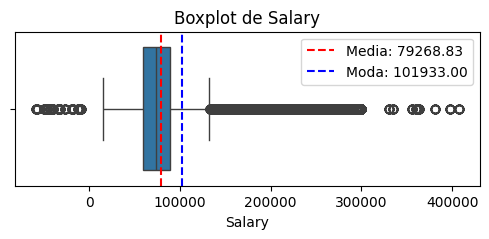

🚩 FLAG: outliers - CLV: 36192 (8.92%)


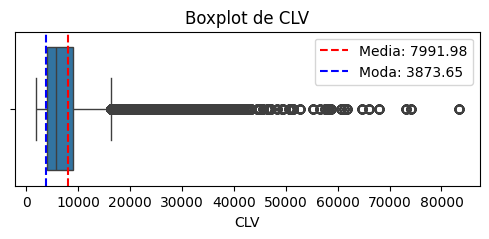


🏁 REVISIÓN EDA FINALIZADA


In [14]:
eda(df)